# Projekat iz predmeta Osnovi Računarske Inteligencije

#### Problem koji se rešava je predikcija potrošnje automobila, odnosno predikcija mpg(miles per gallon) na osnovu sledećih atributa:
    1. Broj cilindara
    2. Prenos
    3. Broj konjskih snaga
    4. Težina
    5. Ubrzanje
    6. Godina proizvodnje
    7. Poreklo (1 - Amerika, 2 - Evropa, 3 - Azija)
    8. Naziv automobila
    
#### Dataset: https://www.kaggle.com/uciml/autompg-dataset

#### Broj instanci: 398

#### Broj atributa: 9

### Algoritmi koji su korišćeni:
#####    1. Multivariate Linear Regression
      Regresija ima za cilj da pronađe funkciju koja se “najbolje uklapa” u podatke uz
      pretpostavku da rezultujuća funkcija ne mora da prođe kroz svaku tačku.
#####    2. Ridge Regression 
      Varijacija obične regresije. Korisna ukoliko dataset sadrži outlier-e, koji kvare model.
      Problem rešava dodavanjem kvadrirane norme težina na funkciju greške.
#####    3. Lasso Regression 
      Varijacija obične regresije. Korisna ukoliko dataset ima mali broj nezavisnih promenljivih,
      ali velik broj tačaka. Problem rešava dodavanjem norme težina na funkciju greške.
#####    4. ElasticNet Regression
      Predstavlja kombinaciju Ridge i Lasso regresije.

$$ \textbf{Multivariate Linear Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} =  \sum_{i=1}^{N} (y_{i} - w^\top x_{i})^{2},\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ \frac{\partial E}{\partial w_{j}} = \sum_{i=1}^N 2(y_{i} - w^\top x_{i})(-x_{ij}) = 0, \ i - red, \ j - kolona(nezavisna \ promenljiva) $$

$$ w^\top \sum_{i=1}^N x_{i}x_{ij} = \sum_{i=1}^N y_{i}x_{ij} $$

$$ w^\top(X^\top X) = y^\top X $$

$$ \bigg[w^\top(X^\top X)\bigg]^\top = \bigg[y^\top X\bigg]^\top$$

$$ (X^\top X)w = X^\top y$$

$$ w = (X^\top X)^{-1}X^\top y $$

$$ \textbf{Ridge Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} + \lambda \ |w|^{2},\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ |w|^{2} = w^\top w = w_{1}^{2} + w_{2}^{2} + ... + w_{i}^{2}, \ w - vektor \ težina, \ \lambda - proizvoljan \ parametar $$

$$ \textbf{Matrix form of Error function}: $$

$$ E = (y - Xw)^\top (y - Xw) + \lambda w^\top w $$

$$ E = y^\top y - 2y^\top Xw + w^\top X^\top Xw + \lambda w^\top w $$

$$ \frac{\partial E}{\partial w} = -2X^\top y + 2X^\top Xw + 2 \lambda w = 0 $$

$$ w = (\lambda I + X^\top X)^{-1}X^\top y $$

$$ \textbf{Lasso Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} + \lambda \ |w|,\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ \textbf{Matrix form of Error function}: $$

$$ E = (y - Xw)^\top (y - Xw) + \lambda w$$

$$ E = y^\top y - 2y^\top Xw + w^\top X^\top Xw + \lambda |w| $$
$$ \frac{\partial E}{\partial w} = -2X^\top y + 2X^\top Xw + \lambda sign(w) = 0 $$

$$ sign(x) = 
     \begin{cases}
        1 &\quad\text{if x > 0} \\
       -1 &\quad\text{if x < 0}\\
        0 &\quad\text{if x = 0}\\
     \end{cases} $$
     
$$ \text{Iz prethodne formule w ne može da se izrazi, pa se ovaj problem rešava Gradient Descent algoritmom} $$

$$ \textbf{ElasticNet Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} + \lambda \ |w| + \lambda |w|^{2},\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ |w|^{2} = w^\top w = w_{1}^{2} + w_{2}^{2} + ... + w_{i}^{2}, \ w - vektor \ težina, \ \lambda - proizvoljan \ parametar $$

$$\text{Predikcija se u svakom od prethodnih modela dobija sledećom formulom} $$


$$\textbf{Regression model: } \hat{y} = w^\top X, \ \hat{y} - vektor \ predikcija, \ w - težine $$

### Za evaluaciju modela korišćene su sledeće metrike:
    1. Coefficient of determination (R Squared) - najbolji mogući rezultat je 1.0, može biti i negativan
    2. Mean Absolute Error - što je manja vrednost, model je bolji
    3. Explained Variance Score - najbolji mogući rezultat je 1.0, što je manji model je lošiji

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [14]:
df = pd.read_csv('auto-mpg.csv')

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Za dalju analizu zanemariću naziv automobila, a iz tabele dole se vidi da fali horsepower kolona

In [16]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Vrednosti u horsepower koloni su stringovi pa ih treba konvertovati u broj

In [17]:
type(df.horsepower[0])

str

In [18]:
df = df[df.horsepower != '?']
df.horsepower = df.horsepower.astype('float64')

In [19]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [20]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Vizualizacija

Vizualizacija matrice korelacije



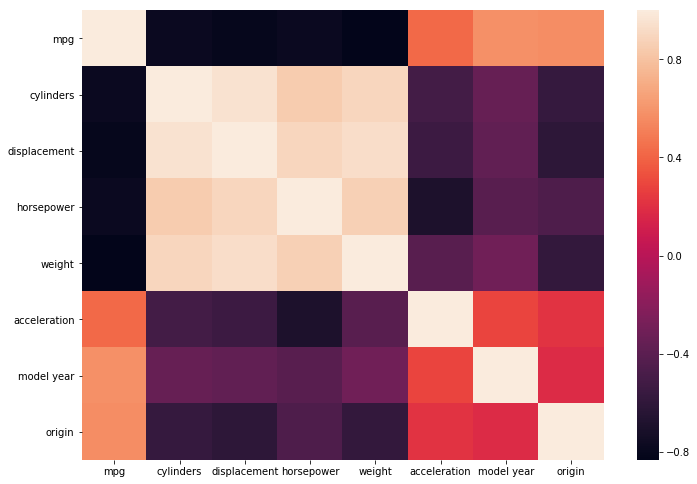

In [21]:
correlation = df.corr(method = 'pearson')

dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = dims)

sns.heatmap(ax = ax, data = correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
print('Vizualizacija matrice korelacije\n')

In [22]:
labels = np.array(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])
stats = correlation.mpg
stats = stats[1 : len(stats)]

In [23]:
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))
stats = abs(stats)

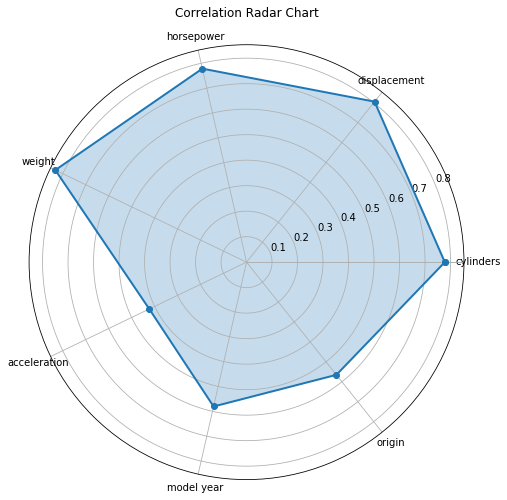

In [24]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, polar = True)   
ax.plot(angles, stats, 'o-', linewidth = 2) 
ax.fill(angles, stats, alpha = 0.25)  
ax.set_thetagrids(angles * 180/np.pi, labels)  
ax.set_title('Correlation Radar Chart')
ax.grid(True)

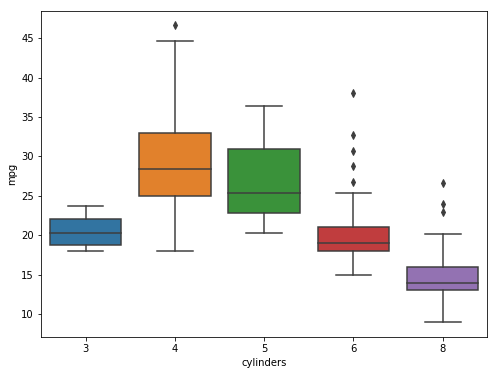

In [25]:
dims = (8, 6)
data = df[['cylinders', 'mpg']]
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax = ax, x = 'cylinders', y='mpg', data = data)
print()

Na prethodnom boxplotu se vidi uticaj broja cilindara na potrošnju, odnosno što je broj cilindara veći, mpg će biti manji, odnosno potrošnja će biti veća, što opravdava negativna korelacija imeđu ova dva atributa.

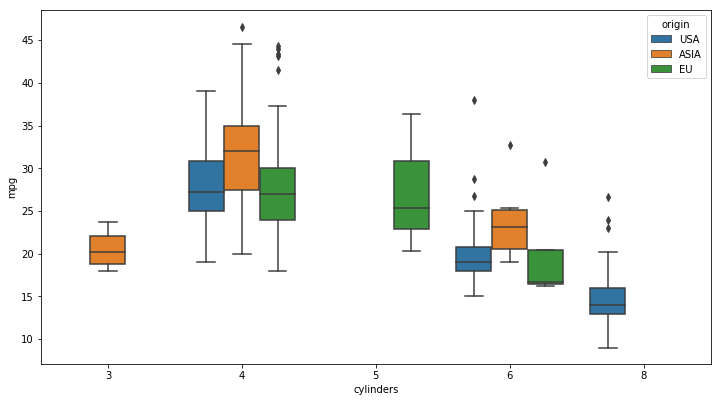

In [26]:
dims = (12, 6.5)
data = df[['cylinders', 'mpg', 'origin']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax = ax, x = 'cylinders', y = 'mpg', hue = 'origin', data = data)
print()

Ukoliko se boxplot podeli po regionima, vidimo da za automobile proizvedene u Americi važi isti trend, kako je broj cilindara veći, veća je i potrošnja. Za automobile proizvedene u Evropi se može isto reći, ali ne prate u potpunosti taj trend, dok za automobile proizvedene u Aziji grafik jasno pokazuje da prethodno pravilo ne važi.

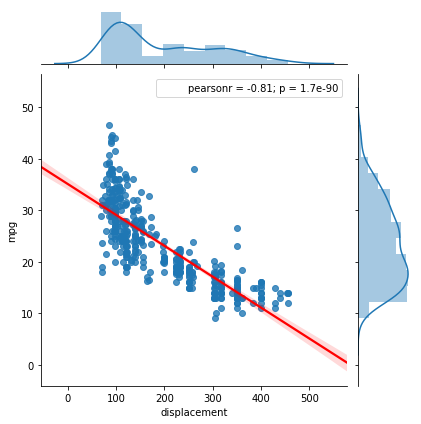

In [27]:
data = df[['displacement', 'mpg']]
g = sns.jointplot(x = 'displacement', y = 'mpg', 
                  data = data, kind = 'reg',
                  joint_kws = {'line_kws':{'color':'red'}})
print()

Na prethodnom grafiku prikazana je linearna zavisnost mpg atributa od dispacement atributa. Korelacija je jaka (-0.81) i negativna, što znači da se povećanjem displacement atributa smanjuje mpg, odnosno potrošnja se povećava.

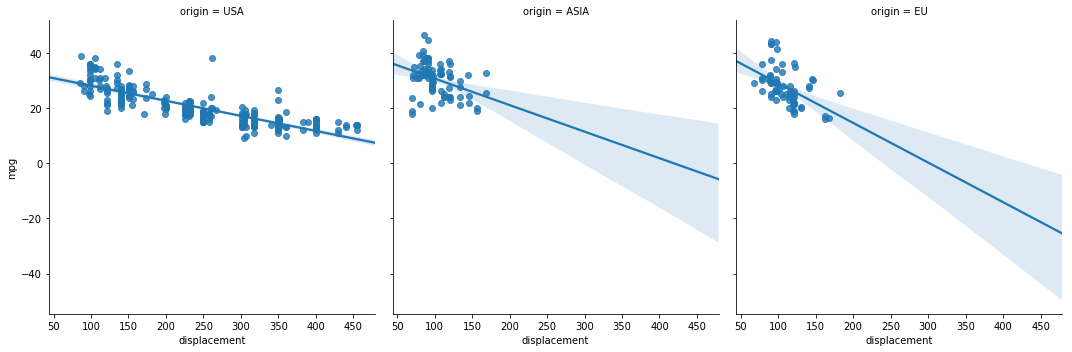

In [28]:
data = df[['displacement', 'mpg', 'origin']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
sns.lmplot(x = 'displacement', y = 'mpg', col = 'origin', data = data,  aspect = 1);

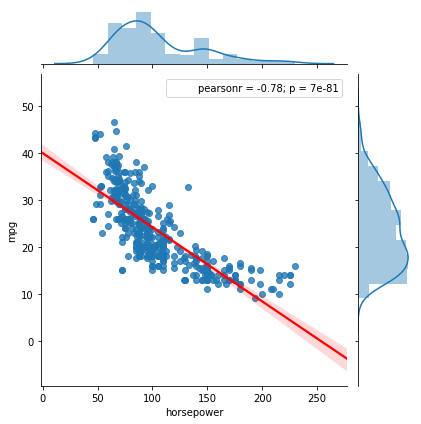

In [29]:
data = df[['horsepower', 'mpg']]
g = sns.jointplot(x = 'horsepower', y = 'mpg', 
                  data = data, kind = 'reg',
                  joint_kws = {'line_kws':{'color':'red'}})
print()

Na prethodnom grafiku prikazana je linearna zavisnost mpg atributa od horsepower atributa. Korelacija je jaka (-0.78) i negativna, što znači da se povećanjem horsepower atributa-a smanjuje mpg, odnosno potrošnja se povećava.

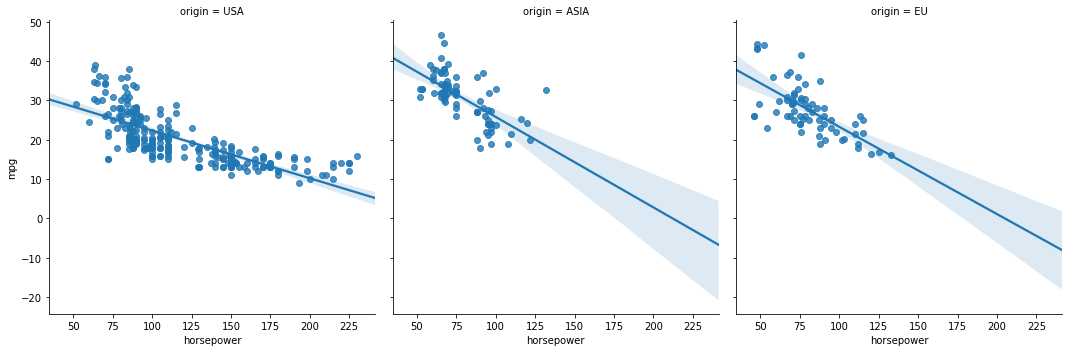

In [30]:
data = df[['horsepower', 'mpg', 'origin']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
sns.lmplot(x = 'horsepower', y = 'mpg', col = 'origin', data = data,  aspect = 1);

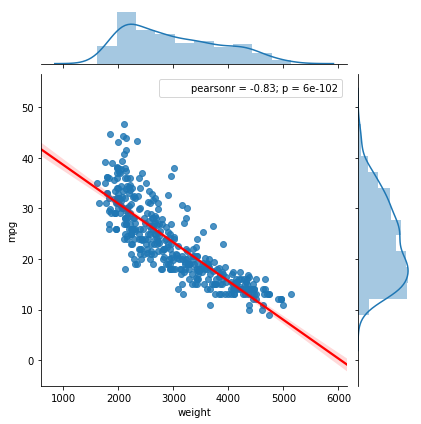

In [31]:
data = df[['weight', 'mpg']]
g = sns.jointplot(x = 'weight', y = 'mpg', 
                  data = data, kind = 'reg',
                  joint_kws = {'line_kws':{'color':'red'}})
print()

Na ovom grafiku prikazana je linearna zavisnost mpg atributa od weight atributa. Weight atribut ima najveću korelaciju (-0.83), što znači da se povećanjem weight atributa smanjuje mpg, odnosno potrošnja se povećava.

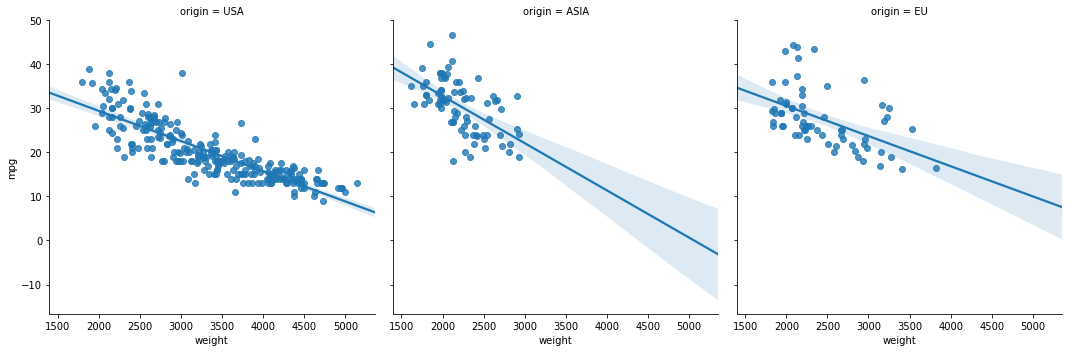

In [32]:
data = df[['weight', 'mpg', 'origin']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
sns.lmplot(x = 'weight', y = 'mpg', col = 'origin', data = data,  aspect = 1);

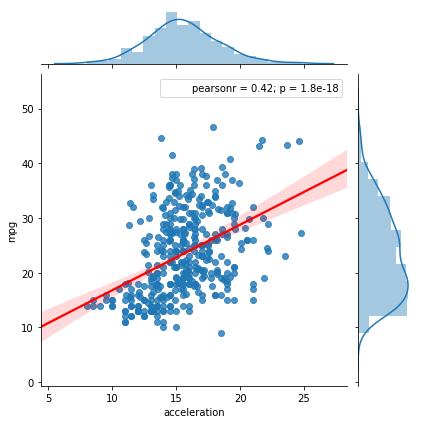

In [33]:
data = df[['acceleration', 'mpg']]
g = sns.jointplot(x = 'acceleration', y = 'mpg', 
                  data = data, kind = 'reg',
                  joint_kws = {'line_kws':{'color':'red'}})
print()

Na ovom grafiku je prikazana linearna zavinost mpg atributa od acceleration atributa. Korelacija je slaba i pozitivna, što znači da sa povećanjem acceleration atributa povećava se mpg, odnosno potrošnja se smanjuje.

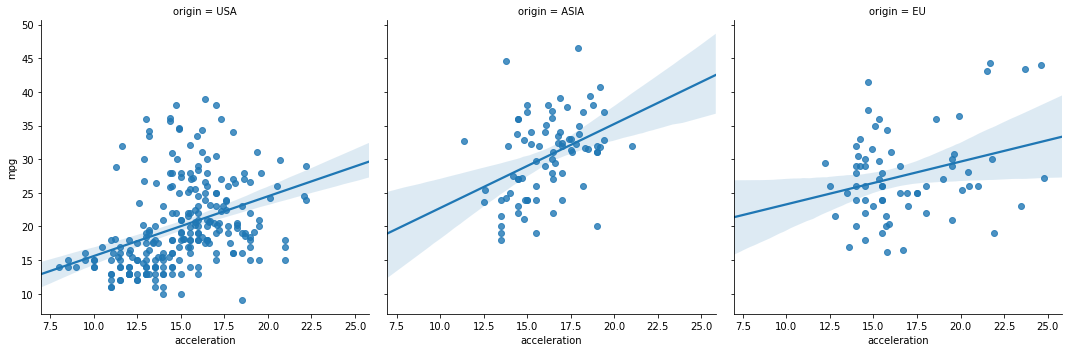

In [34]:
data = df[['acceleration', 'mpg', 'origin']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
sns.lmplot(x = 'acceleration', y = 'mpg', col = 'origin', data = data,  aspect = 1);

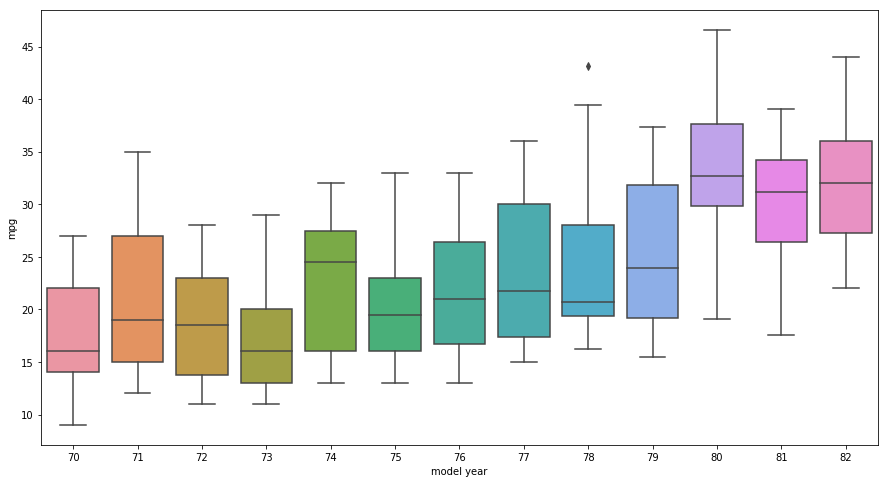

In [35]:
dims = (15, 8)
data = df[['model year', 'mpg']]
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax = ax, x = 'model year', y = 'mpg', data = data)
print()

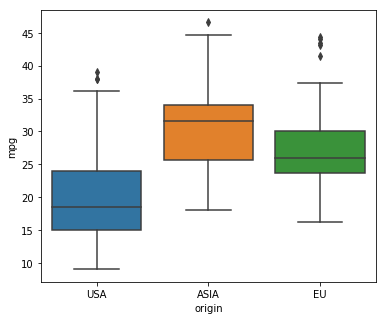

In [36]:
dims = (6, 5)
data = df[['origin', 'mpg']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax = ax, x = 'origin', y = 'mpg', data = data)
print()

Ovaj boxplot pokazuje da američki automobili troše najviše, a Azijski najmanje.

MPG Histogram


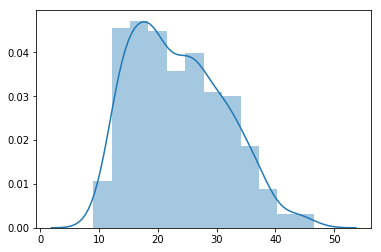

In [37]:
sns.distplot(df.iloc[:, 0].values)
print('MPG Histogram')

Cylinders Histogram


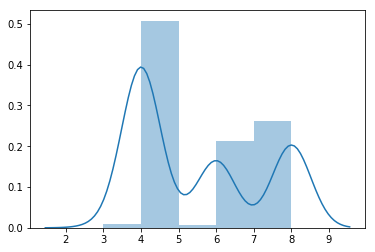

In [38]:
sns.distplot(df.iloc[:, 1].values)
print('Cylinders Histogram')

Displacement Histogram


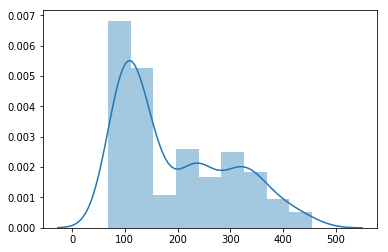

In [39]:
sns.distplot(df.iloc[:, 2].values)
print('Displacement Histogram')

Horsepower Histogram


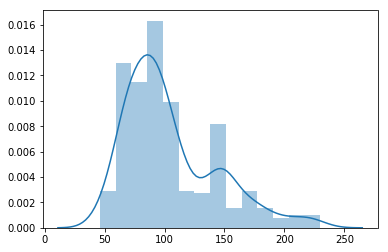

In [40]:
sns.distplot(df.iloc[:, 3].values)
print('Horsepower Histogram')

Weight Histogram


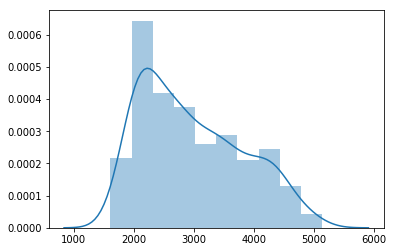

In [41]:
sns.distplot(df.iloc[:, 4].values)
print('Weight Histogram')

Acceleration Histogram


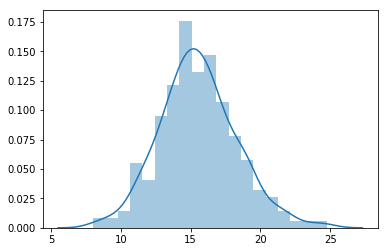

In [42]:
sns.distplot(df.iloc[:, 5].values)
print('Acceleration Histogram')

Model Year Histogram


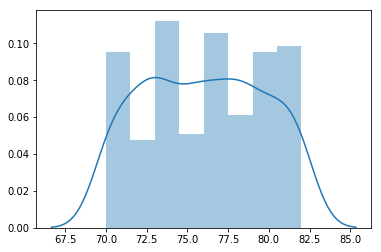

In [43]:
sns.distplot(df.iloc[:, 6].values)
print('Model Year Histogram')

Origin Histogram


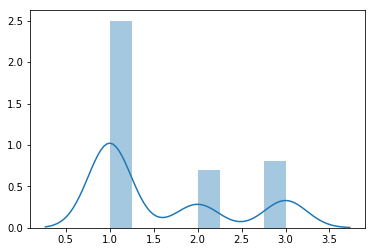

In [44]:
sns.distplot(df.iloc[:, 7].values)
print('Origin Histogram')

### Predikcija koristeći sve nezavisne promenjive sem poslednje - naziv automobila

In [45]:
import stats
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1 : 8].values.astype('float64')
y = df.iloc[:, 0].values.astype('float64')

df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [46]:
for i in range(0, X.shape[1]):
    print('Correlation between Y and X{} is {}'.format(i+1,
          stats.get_pearson_corr(y.tolist(), X[:, i].tolist())))

Correlation between Y and X1 is -0.7776175081260218
Correlation between Y and X2 is -0.8051269467104581
Correlation between Y and X3 is -0.7784267838977751
Correlation between Y and X4 is -0.8322442148315757
Correlation between Y and X5 is 0.4233285369027873
Correlation between Y and X6 is 0.580540966090785
Correlation between Y and X7 is 0.5652087567164613


In [47]:
X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
from linear_model import LinearRegression, Ridge, Lasso, ElasticNet

models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))

In [49]:
for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.8137427516623791 MAE: 0.30964832158846334 R^2: 0.8118881423003085
Ridge => EVS: 0.7867401491718748 MAE: 0.3289504822276145 R^2: 0.7827038041355148
Lasso => EVS: 0.8184797142503898 MAE: 0.30317027340954156 R^2: 0.8159781857226711
ElasticNet => EVS: 0.7866635597224549 MAE: 0.3291253657750964 R^2: 0.7826107931255257


### Predikcija koristeći samo dve nezavisne promenjive - težina i godina proizvodnje
Na ovom primeru vidi se da se postiže veća preciznost sa samo dve nezavisne promenljive, za razliku od prethodnog primera gde su korišćene sve nezavisne promenljive, osim naziva automobila

In [50]:
X = df.iloc[:, [4,6]].values.astype('float64')
y = df.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.8168479801268531 MAE: 0.3151727109945979 R^2: 0.8150789318775375
Ridge => EVS: 0.8129433082627084 MAE: 0.30506350356896544 R^2: 0.8111124366647706
Lasso => EVS: 0.8241103608021633 MAE: 0.30482051350375394 R^2: 0.8221384067005659
ElasticNet => EVS: 0.8131265417767104 MAE: 0.3046368490788623 R^2: 0.8112747841787118


### Predikcija za automobile Americkih proizvođača

In [51]:
usa = df.loc[df['origin'] == 1]

In [52]:
X = usa.iloc[:, 1 : 7].values.astype('float64')
y = usa.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.8831196284652548 MAE: 0.25063561320840566 R^2: 0.8825896017666394
Ridge => EVS: 0.8301534298422119 MAE: 0.3129163541154436 R^2: 0.8293606768168369
Lasso => EVS: 0.8569763775212602 MAE: 0.27922462957584737 R^2: 0.8566861373301589
ElasticNet => EVS: 0.8304967164587895 MAE: 0.3126435700622002 R^2: 0.829713418376318


Nakon podele dataseta na osnovu porekla automobila, vidimo da je za automobile proizvedene u Americi predikcija znatno bolja u poređenju sa predikcijom koja je izvšena nad celim datasetom.

### Predikcija za automobile Evropskih proizvođača

In [53]:
europe = df.loc[df['origin'] == 2]

In [54]:
X = europe.iloc[:, 1 : 7].values.astype('float64')
y = europe.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.5098774688575416 MAE: 0.6233861518595981 R^2: 0.5082449437063821
Ridge => EVS: 0.45323910997516825 MAE: 0.6217196117618976 R^2: 0.4508153742709565
Lasso => EVS: 0.5454371335965331 MAE: 0.5927762121981704 R^2: 0.5441842326394075
ElasticNet => EVS: 0.4544372750216954 MAE: 0.6211592499534058 R^2: 0.45201476103647176


### Predikcija za automobile Azijskih proizvođača

In [55]:
asia = df.loc[df['origin'] == 3]

In [56]:
X = asia.iloc[:, 1 : 7].values.astype('float64')
y = asia.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.5676383330883727 MAE: 0.474171672610692 R^2: 0.5676096725465458
Ridge => EVS: 0.48146943660348496 MAE: 0.5681333649478454 R^2: 0.47967239260830485
Lasso => EVS: 0.5219760158472578 MAE: 0.5192771083154704 R^2: 0.5219378781391298
ElasticNet => EVS: 0.4820667675106698 MAE: 0.56796418452623 R^2: 0.48035130111317603


Prilikom predikcije za automobile proizvedene u Evropi i Aziji dobijaju se dosta lošiji rezultati, za razliku od automobila koji su proizvedeni u Americi.

### Analiza uticaja pojedinačnih atributa na predikciju

In [57]:
X = df.iloc[:, 1 : 8].values.astype('float64')
y = df.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### MPG - Cylinders

In [58]:
X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X[:, [0]], y, test_size=0.3, random_state=42)

In [59]:
for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.5668336933462839 MAE: 0.4873278266011343 R^2: 0.5587622965963118
Ridge => EVS: 0.556768608127677 MAE: 0.49673037703145456 R^2: 0.5500064945189098
Lasso => EVS: 0.5722772516515706 MAE: 0.484394749163381 R^2: 0.5644358816852179
ElasticNet => EVS: 0.5571106558861224 MAE: 0.4965091610095421 R^2: 0.5503414740400894


#### MPG - Displacement

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [1]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.6037855321212591 MAE: 0.4834732835407762 R^2: 0.5921166112880016
Ridge => EVS: 0.6059931744546936 MAE: 0.46286713021791176 R^2: 0.596899982641425
Lasso => EVS: 0.6124941137459282 MAE: 0.47362460989295585 R^2: 0.6012657119709192
ElasticNet => EVS: 0.6063395766171022 MAE: 0.46271082755014303 R^2: 0.5972321423304775


#### MPG - Horsepower

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [2]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.55011528816607 MAE: 0.5095248964223428 R^2: 0.5432002403224394
Ridge => EVS: 0.5602514558209142 MAE: 0.5059906030722556 R^2: 0.554293546067977
Lasso => EVS: 0.5601166099409893 MAE: 0.5044721261317947 R^2: 0.5533668083468993
ElasticNet => EVS: 0.5605318448221897 MAE: 0.5058721368251349 R^2: 0.5545686701534762


#### MPG - Weight

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [3]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.6798480346210569 MAE: 0.42683343779674116 R^2: 0.6728137524031409
Ridge => EVS: 0.6762705980178316 MAE: 0.40891007137410523 R^2: 0.6702364097294837
Lasso => EVS: 0.6883869090251569 MAE: 0.41743677803013185 R^2: 0.6815160971565097
ElasticNet => EVS: 0.6767035066081235 MAE: 0.40862418732137606 R^2: 0.6706634924367252


#### MPG - Acceleration

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [4]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.13520363432268256 MAE: 0.7161943929770985 R^2: 0.13047936255853188
Ridge => EVS: 0.13562581784543704 MAE: 0.7242573266663124 R^2: 0.1311617432371277
Lasso => EVS: 0.13785844667472613 MAE: 0.7171194013704604 R^2: 0.13321462173296794
ElasticNet => EVS: 0.13559121134662955 MAE: 0.7242971083836421 R^2: 0.13112790844911004


#### MPG - Model Year

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [5]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.33778607294684304 MAE: 0.6483234641646715 R^2: 0.33777103535545605
Ridge => EVS: 0.33436930288545996 MAE: 0.6593407737219322 R^2: 0.3341734815344114
Lasso => EVS: 0.3429629649609607 MAE: 0.6496030463599737 R^2: 0.3429629261515388
ElasticNet => EVS: 0.33421581625073804 MAE: 0.659397230945727 R^2: 0.3340179364288579


#### MPG - Origin

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [6]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.3013769901082649 MAE: 0.6168745306970007 R^2: 0.2937710085485875
Ridge => EVS: 0.2929112562453796 MAE: 0.6352353210210605 R^2: 0.2864536220355096
Lasso => EVS: 0.3039380913936044 MAE: 0.6207775885320207 R^2: 0.2966089695413725
ElasticNet => EVS: 0.2927753074352525 MAE: 0.6353354841491907 R^2: 0.28632208751649


Iz prethodnih analize, vidi se da atribut koji ima najviše uticaja na MPG je težina automobila, zatim prenos, i posle toga broj konjskih snaga i broj cilindara otrpilike podjednako utiču na predikciju

### Boosting Algoritmi

In [66]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

X = df.iloc[:, 1 : 8].values.astype('float64')
y = df.iloc[:, 0].values.astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
models = []
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('Bagging', BaggingRegressor()))
models.append(('ExtraTree', ExtraTreesRegressor()))
models.append(('GradientBoosting', GradientBoostingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))

def get_feature_importance_plot(model, name):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for tree in model.estimators_], axis=0)
    
    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title("Feature importances for {}".format(name))
    plt.bar(range(X.shape[1]), importances[indices], color="m", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    print(max(importances))
    plt.text(4.9,max(importances),'0 - Cylinders')
    plt.text(4.9,max(importances)-0.02,'1 - Displacement')
    plt.text(4.9,max(importances)-0.04,'2 - Horsepower')
    plt.text(4.9,max(importances)-0.06,'3 - Weight')
    plt.text(4.9,max(importances)-0.08,'4 - Acceleration')
    plt.text(4.9,max(importances)-0.1,'5 - Model Year')
    plt.text(4.9,max(importances)-0.12,'6 - Origin')
    plt.show()

AdaBoost => EVS: 0.8401026857635953 MAE: 2.315552265518334 R^2: 0.8149101072943838
AdaBoost features:
[0.04483587 0.1468286  0.25900647 0.29257918 0.02945568 0.21905931
 0.00823489]

0.29257918080116657


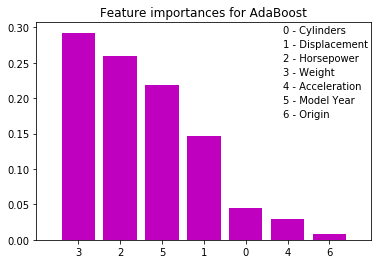

Bagging => EVS: 0.8601634218621854 MAE: 1.9642372881355934 R^2: 0.8498506572043307
{} doesn't have feature_importances_ field property

ExtraTree => EVS: 0.8925891466175414 MAE: 1.7452542372881361 R^2: 0.8826979353811124
ExtraTree features:
[0.28687336 0.24896101 0.06656621 0.21918595 0.03095205 0.1381788
 0.00928263]

0.2868733632828773


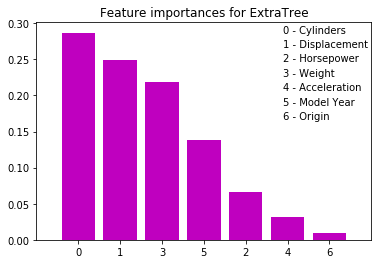

GradientBoosting => EVS: 0.8593251562044594 MAE: 1.9683134092261179 R^2: 0.8510014329823656
GradientBoosting features:
[0.04117788 0.17039918 0.1922113  0.25287152 0.18465446 0.13624285
 0.02244282]

0.25287151777513317


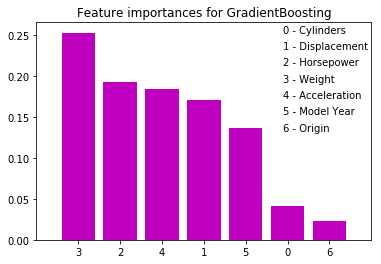

RandomForest => EVS: 0.8784427838115374 MAE: 1.885084745762712 R^2: 0.8670227140725573
RandomForest features:
[0.06617755 0.40798252 0.26196759 0.14031756 0.0199827  0.09588116
 0.00769092]

0.40798251997473534


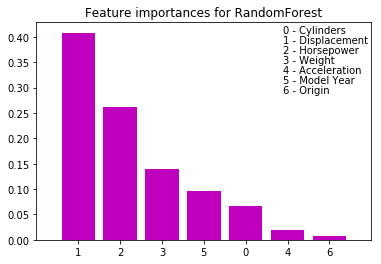

In [68]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
        
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared) 
    print(msg)
    
    if hasattr(model, 'feature_importances_'):
        print("{} features:\n{}\n".format(name, model.feature_importances_))
        get_feature_importance_plot(model, name)
    else:
        print("{} doesn't have feature_importances_ field property\n")

Primenom boosting algoritama dobijaju se dosta bolji rezultati nego primenom klasičnih regresionih metoda.

Na graficima se vidi koji atributi su imali najveći uticaj na predikciju.

Vrednosti uticaja atributa na predikciju su pozitivni i njihov zbir je 1. Što je veća vrednost, to je veći uticaj atributa na predikciju.

### Predikcija za automobile Americkih proizvođača - Boosting Algoritmi

In [69]:
def get_feature_importance_plot_origin(model, name):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for tree in model.estimators_], axis=0)
    
    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title("Feature importances for {}".format(name))
    plt.bar(range(X.shape[1]), importances[indices], color="m", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    print(max(importances))
    plt.text(4.1,max(importances),'0 - Cylinders')
    plt.text(4.1,max(importances)-0.02,'1 - Displacement')
    plt.text(4.1,max(importances)-0.04,'2 - Horsepower')
    plt.text(4.1,max(importances)-0.06,'3 - Weight')
    plt.text(4.1,max(importances)-0.08,'4 - Acceleration')
    plt.text(4.1,max(importances)-0.1,'5 - Model Year')
    plt.show()

AdaBoost => EVS: 0.8899885040177554 MAE: 1.5152065899382803 R^2: 0.8842539769050282
AdaBoost features:
[3.72418683e-04 2.22139724e-01 1.00223370e-01 3.98949779e-01
 2.75439306e-02 2.50770778e-01]

0.398949779021765


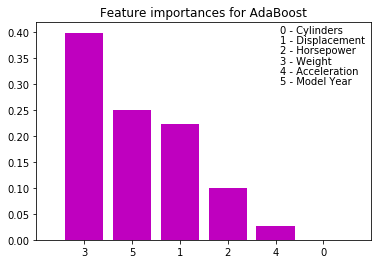

Bagging => EVS: 0.9105325647893208 MAE: 1.4706756756756754 R^2: 0.9086145481289913
{} doesn't have feature_importances_ field property

ExtraTree => EVS: 0.8920213775927457 MAE: 1.5895945945945944 R^2: 0.8906759294840292
ExtraTree features:
[0.49215712 0.20970566 0.10444165 0.05376757 0.0349982  0.10492981]

0.49215711502911985


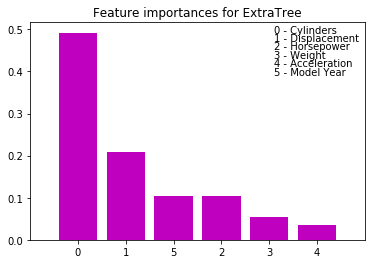

GradientBoosting => EVS: 0.9113698827173478 MAE: 1.371991419742537 R^2: 0.9099154880493318
GradientBoosting features:
[0.00266413 0.18170527 0.19996798 0.29140978 0.20065386 0.12359899]

0.29140977865600026


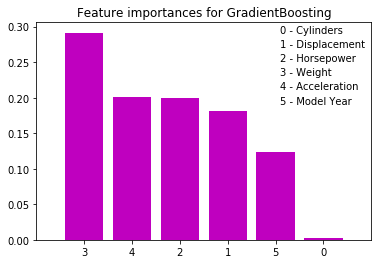

RandomForest => EVS: 0.9002833825679488 MAE: 1.5401351351351351 R^2: 0.8991573255936891
RandomForest features:
[0.00127868 0.43879201 0.09338392 0.36991254 0.03204962 0.06458323]

0.4387920106292649


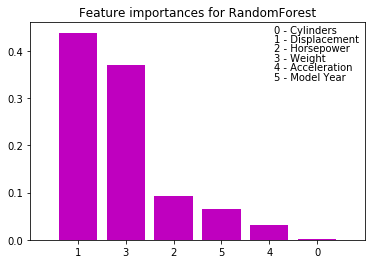

In [70]:
usa = df.loc[df['origin'] == 1]

X = usa.iloc[:, 1 : 7].values.astype('float64')
y = usa.iloc[:, 0].values.astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
        
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared) 
    print(msg)
    
    if hasattr(model, 'feature_importances_'):
        print("{} features:\n{}\n".format(name, model.feature_importances_))
        get_feature_importance_plot_origin(model, name)
    else:
        print("{} doesn't have feature_importances_ field property\n")

Kao i prilikom upotrebe klasičnih regresionih metoda, na podskupu dataset-a
koji se odnosi samo na američke proizvođače rezultati su bolji nego na celom dataset-u

### Predikcija za automobile Evropskih proizvođača - Boosting Algoritmi

AdaBoost => EVS: 0.7765198735496714 MAE: 2.705831438855735 R^2: 0.7683306502533707
AdaBoost features:
[0.00473581 0.07382666 0.3461391  0.14702692 0.06419722 0.36407428]

0.364074284466467


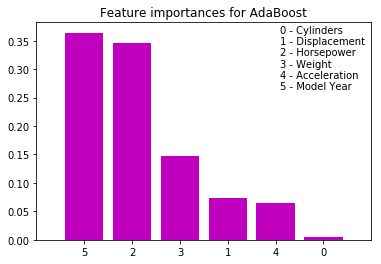

Bagging => EVS: 0.6843983070912749 MAE: 3.115238095238096 R^2: 0.6830095744051142
{} doesn't have feature_importances_ field property

ExtraTree => EVS: 0.7580748897537588 MAE: 2.769047619047618 R^2: 0.756619486763052
ExtraTree features:
[0.0082044  0.08312692 0.31672512 0.16753484 0.0691925  0.35521623]

0.355216227330274


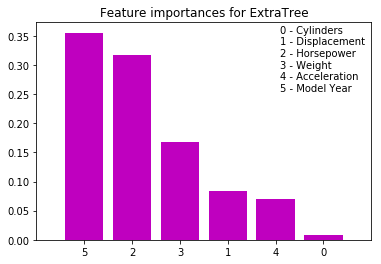

GradientBoosting => EVS: 0.7348148443187624 MAE: 2.9580235096014054 R^2: 0.7182430988185762
GradientBoosting features:
[0.02793113 0.13647578 0.17011441 0.33400594 0.1186297  0.21284304]

0.33400593553369873


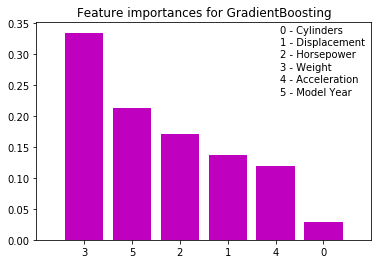

RandomForest => EVS: 0.7231089440037883 MAE: 3.1280952380952374 R^2: 0.7205560359817096
RandomForest features:
[0.01262994 0.07149521 0.36834735 0.18103435 0.05407051 0.31242264]

0.36834734524753066


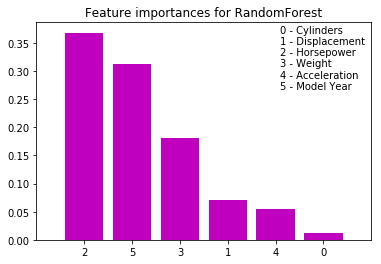

In [71]:
europe = df.loc[df['origin'] == 2]

X = europe.iloc[:, 1 : 7].values.astype('float64')
y = europe.iloc[:, 0].values.astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
        
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared) 
    print(msg)
    
    if hasattr(model, 'feature_importances_'):
        print("{} features:\n{}\n".format(name, model.feature_importances_))
        get_feature_importance_plot_origin(model, name)
    else:
        print("{} doesn't have feature_importances_ field property\n")

Na primeru evropskih proizvođača se vidi najveća razlika imeđu klasičnih regresionih metoda i boosting algoritama. Gde se upotrebom boosting algoritama postižu znatno bolje predikcije, dok su predikcije klasičnih regresija praktično beskorisne.

### Predikcija za automobile Azijskih proizvođača - Boosting Algoritmi

AdaBoost => EVS: 0.6523437240096441 MAE: 2.574191744801728 R^2: 0.650611057280766
AdaBoost features:
[0.00761116 0.07194305 0.28726931 0.2553459  0.11212371 0.26570687]

0.28726931340857526


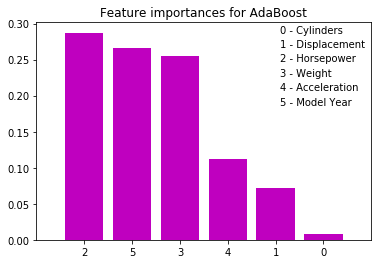

Bagging => EVS: 0.5897520615894569 MAE: 2.8437500000000013 R^2: 0.5894244338082755
{} doesn't have feature_importances_ field property

ExtraTree => EVS: 0.7195051315163807 MAE: 2.337916666666667 R^2: 0.7171034201066584
ExtraTree features:
[0.078473   0.09480767 0.26082108 0.17981363 0.11181061 0.27427402]

0.27427402324155314


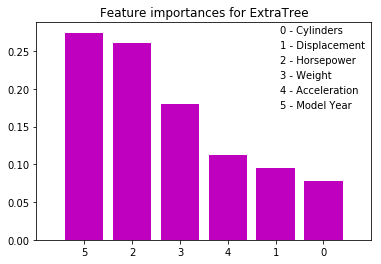

GradientBoosting => EVS: 0.6528908429382025 MAE: 2.5310990686861152 R^2: 0.6528877659735044
GradientBoosting features:
[0.00101512 0.11318137 0.15988837 0.25515076 0.33611522 0.13464917]

0.33611522154983736


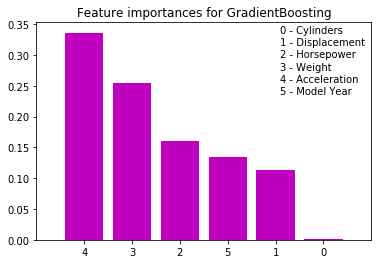

RandomForest => EVS: 0.5723704273559398 MAE: 2.9816666666666656 R^2: 0.5721933489651234
RandomForest features:
[0.00609614 0.07715359 0.45525425 0.1145003  0.15336063 0.19363509]

0.4552542516442


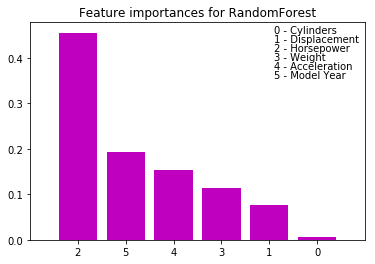

In [72]:
asia = df.loc[df['origin'] == 3]

X = asia.iloc[:, 1 : 7].values.astype('float64')
y = asia.iloc[:, 0].values.astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
        
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared) 
    print(msg)
    
    if hasattr(model, 'feature_importances_'):
        print("{} features:\n{}\n".format(name, model.feature_importances_))
        get_feature_importance_plot_origin(model, name)
    else:
        print("{} doesn't have feature_importances_ field property\n")

Na primeru azijskih proizvođača boosting algoritmi su takođe postigli bolje rezultate od klasične regresije, ali ne toliko bolje koliko je to na primeru evopskih proizvođača.